In [90]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split 
import seaborn as sns
from sklearn.datasets import load_boston
import pickle

In [24]:
boston=load_boston()
boston_column=boston.feature_names
boston_pd=pd.DataFrame(boston.data,columns=boston_column)
boston_pd['price']=boston.target

In [25]:
boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [26]:
boston_pd.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [29]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [31]:
boston_pd.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [32]:
boston_pd.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [33]:
boston_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
price      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


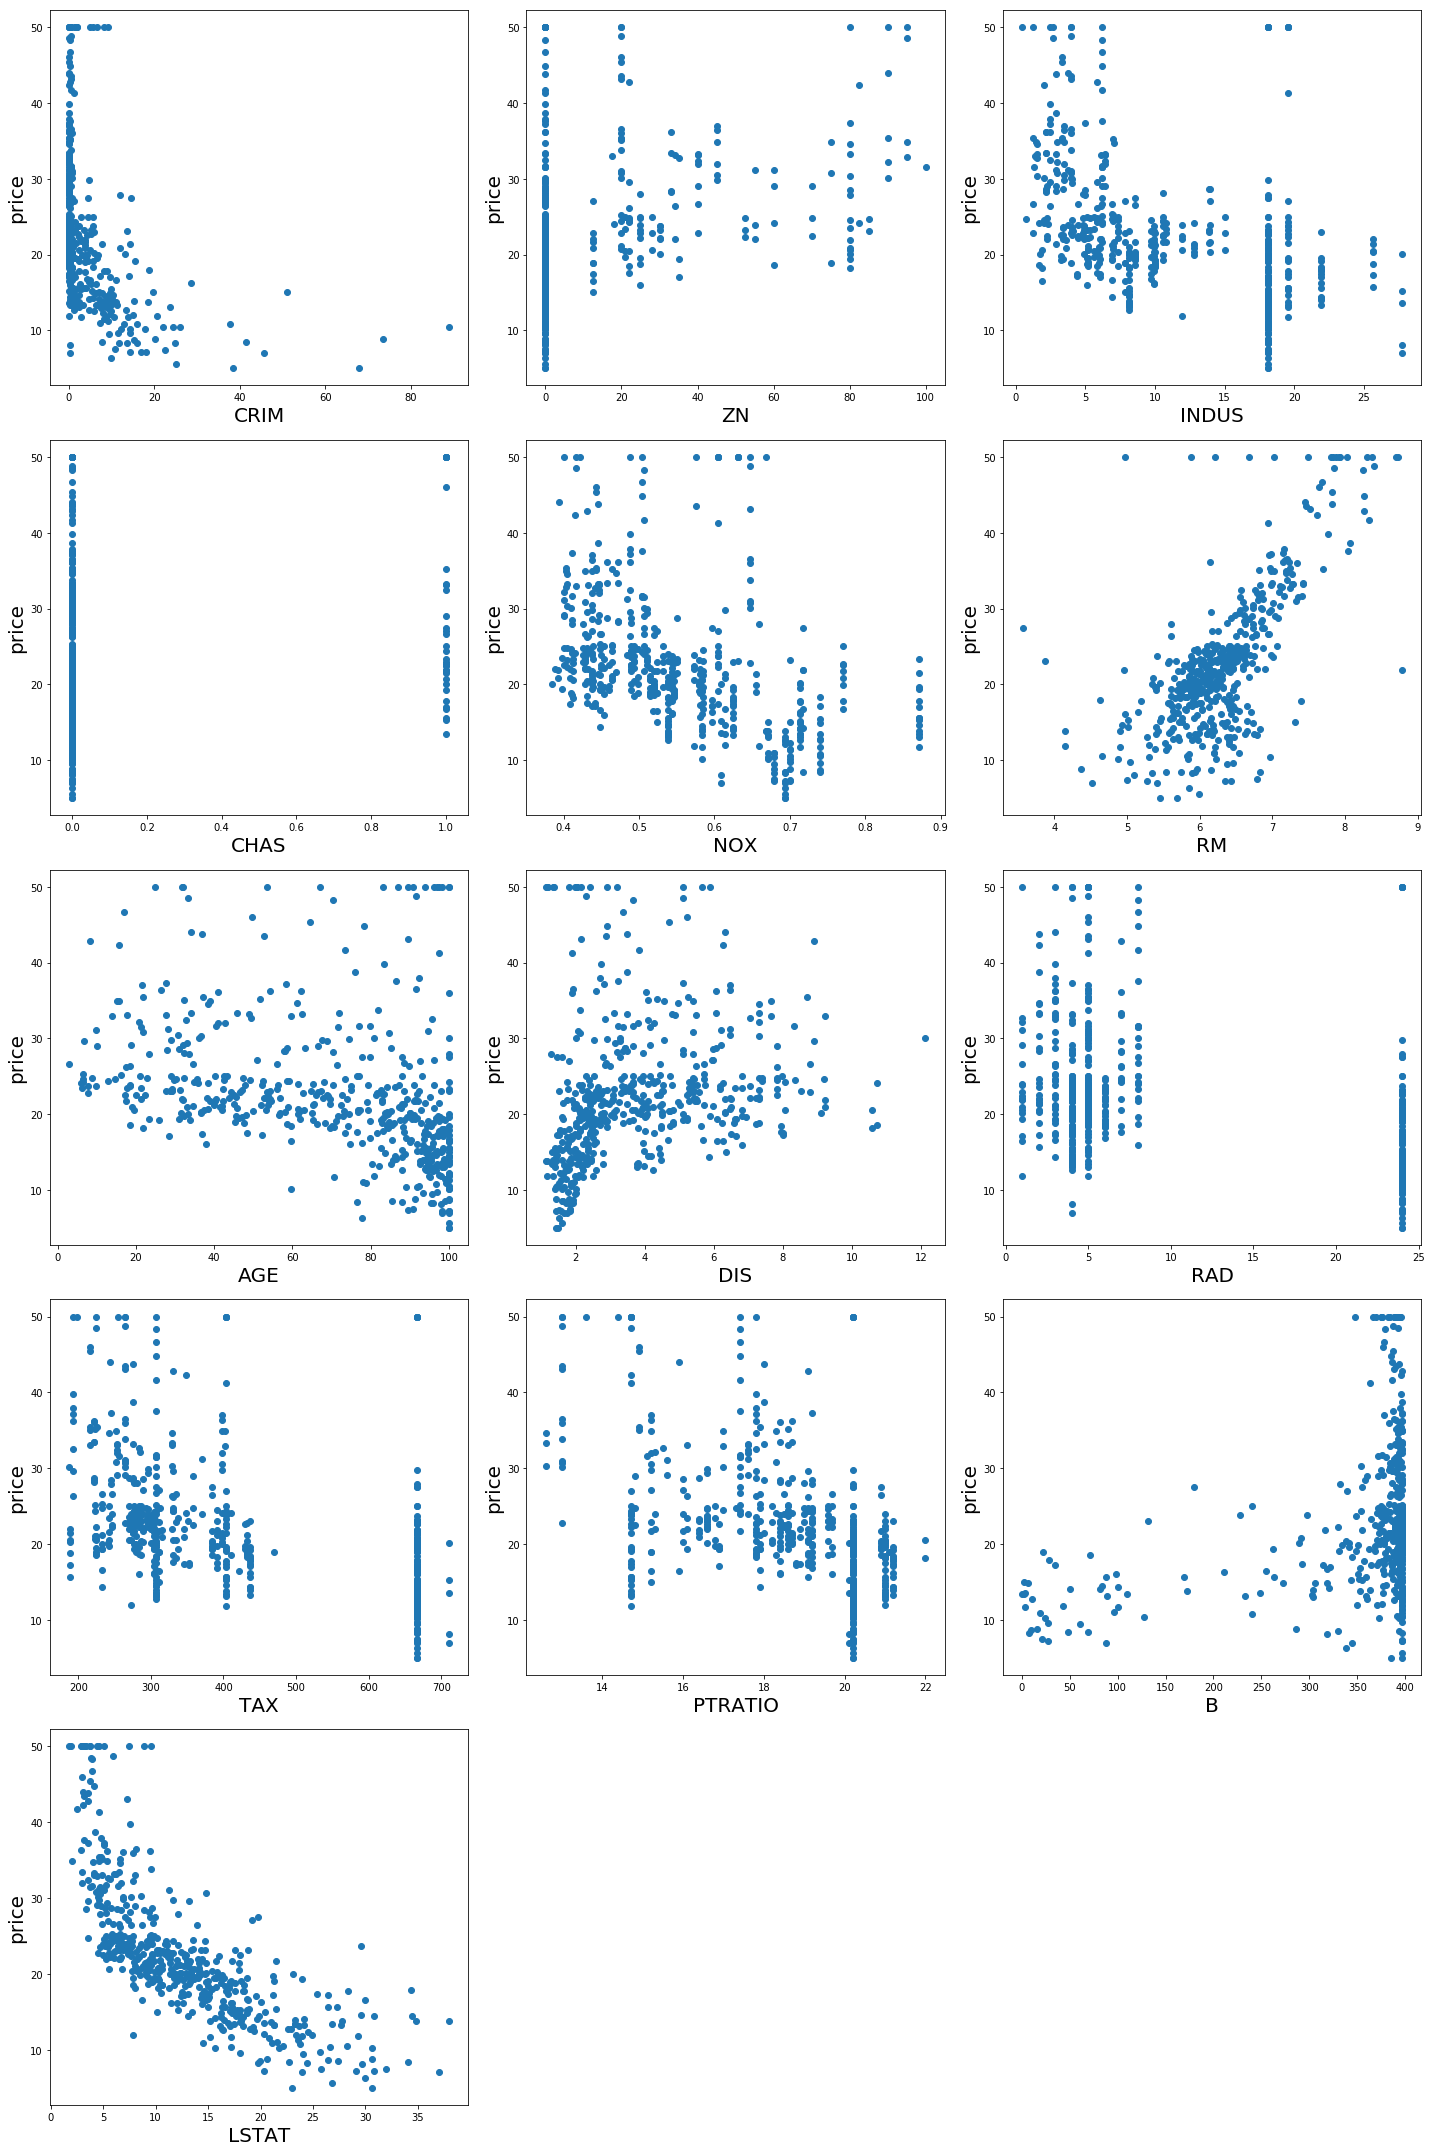

In [55]:
'''
fig,axs=plt.subplots(5,3)
boston_pd.plot(kind='scatter',x='CRIM',y='price',ax=axs[0][0],figsize=(24, 12))
boston_pd.plot(kind='scatter',x='ZN',y='price',ax=axs[0][1])
boston_pd.plot(kind='scatter',x='INDUS',y='price',ax=axs[0][2])
boston_pd.plot(kind='scatter',x='CHAS',y='price',ax=axs[1][0])
boston_pd.plot(kind='scatter',x='NOX',y='price',ax=axs[1][1])
boston_pd.plot(kind='scatter',x='RM',y='price',ax=axs[1][2])
boston_pd.plot(kind='scatter',x='AGE',y='price',ax=axs[2][0])
boston_pd.plot(kind='scatter',x='DIS',y='price',ax=axs[2][1])
boston_pd.plot(kind='scatter',x='RAD',y='price',ax=axs[2][2])
boston_pd.plot(kind='scatter',x='TAX',y='price',ax=axs[3][0])
boston_pd.plot(kind='scatter',x='PTRATIO',y='price',ax=axs[3][1])
boston_pd.plot(kind='scatter',x='B',y='price',ax=axs[3][2])
boston_pd.plot(kind='scatter',x='LSTAT',y='price',ax=axs[4][0])
'''
y = boston_pd['price']
X =boston_pd.drop(columns = ['price'])
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

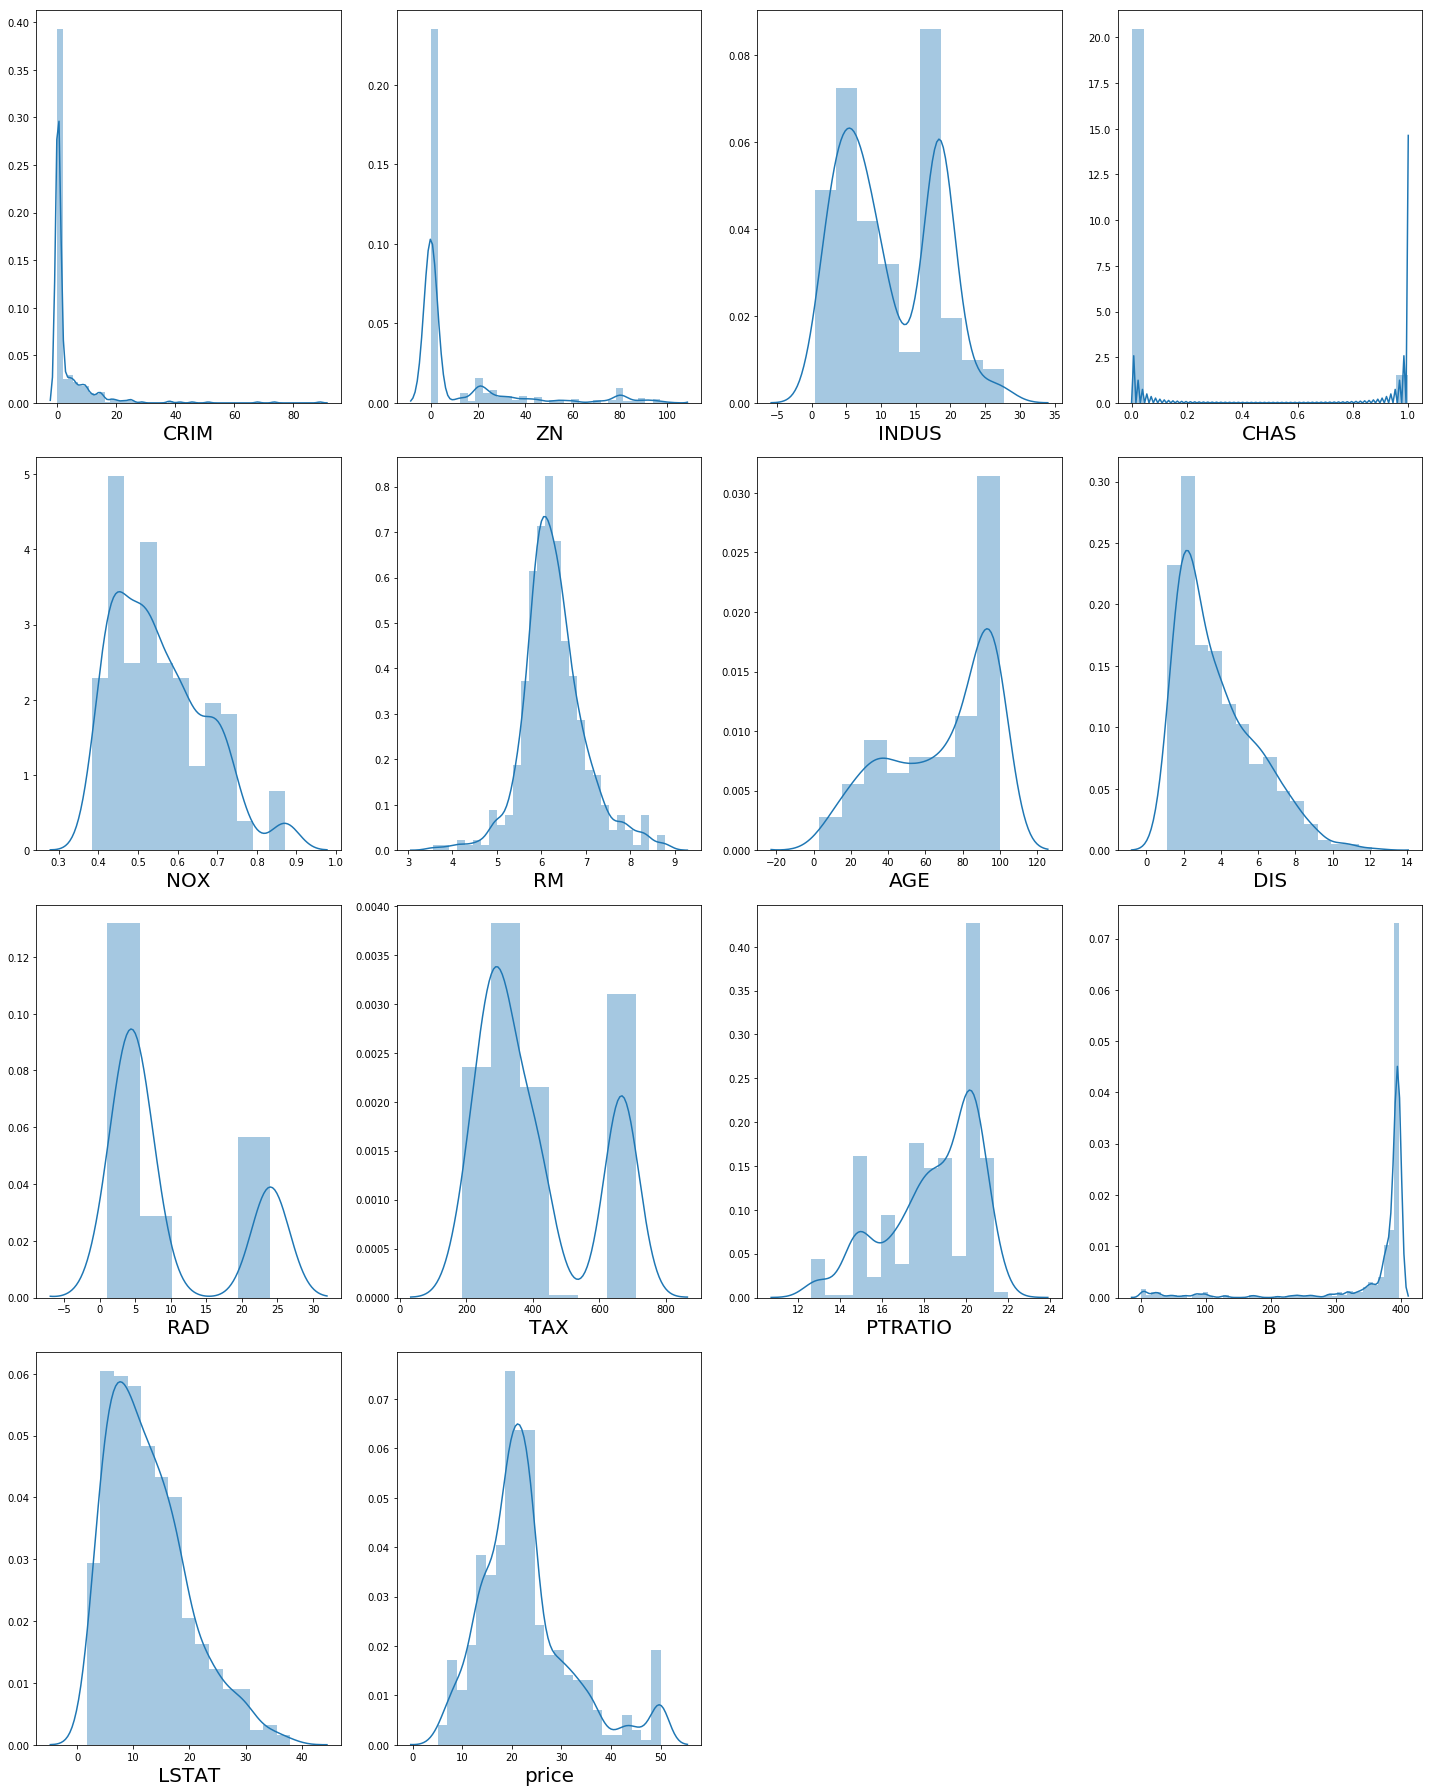

In [39]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in boston_pd:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(boston_pd[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

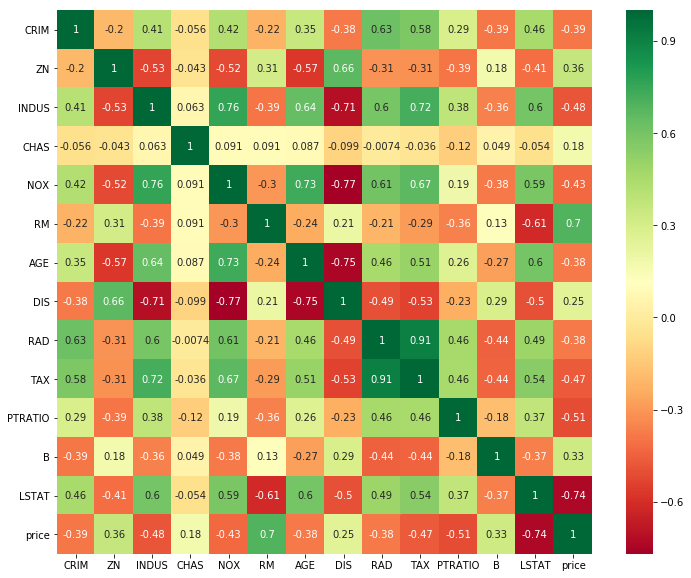

In [60]:
plt.figure(figsize=(12,10))
p=sns.heatmap(boston_pd.corr(), annot=True,cmap ='RdYlGn')

In [65]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
variables=X_scaled

vif=pd.DataFrame()

vif['VIF']= [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

vif["Features"] = X.columns
vif

,VIF,Features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


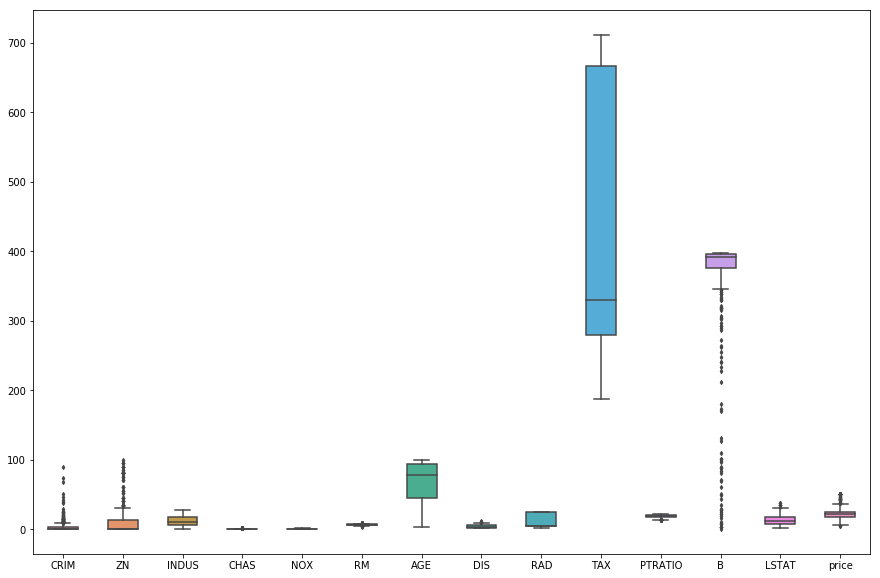

In [68]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=boston_pd, width= 0.5,ax=ax,  fliersize=3)

In [86]:
q=boston_pd['LSTAT'].quantile(0.98)
data_cleaned=boston_pd[boston_pd['LSTAT']<q]
q=boston_pd['RM'].quantile(0.99)
data_cleaned=boston_pd[boston_pd['RM']<q]
cleaned_boston_pd=data_cleaned.drop(columns=['CRIM','ZN','INDUS','CHAS','NOX','RAD','TAX','PTRATIO','B'])

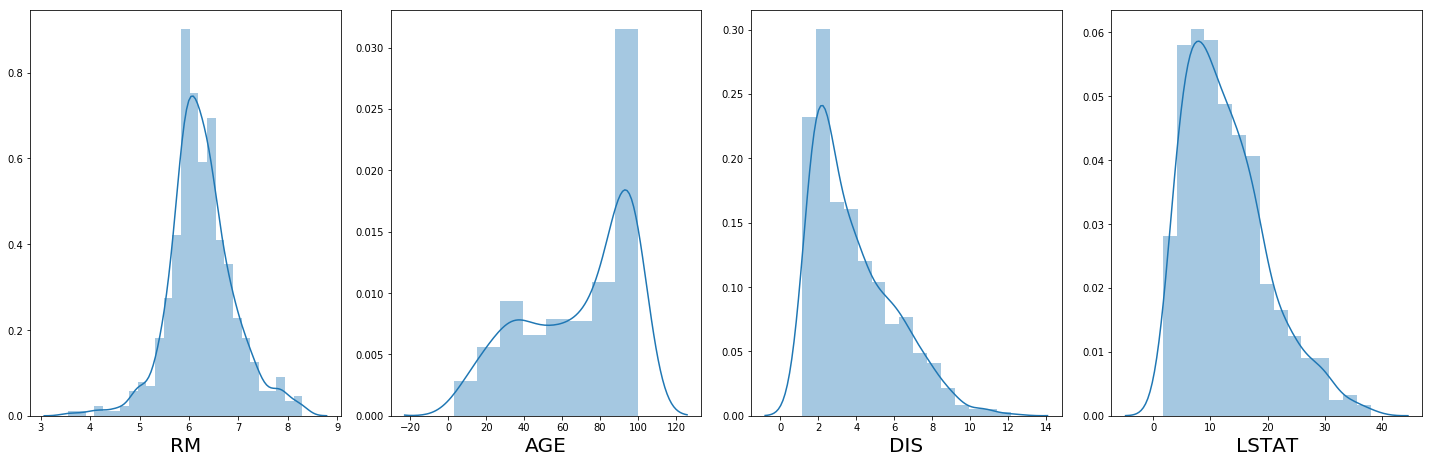

In [87]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in cleaned_boston_pd:
    if plotnumber <=4:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(cleaned_boston_pd[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [89]:
X=cleaned_boston_pd.drop(columns=['price'])
y=cleaned_boston_pd['price']
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size= 0.20, random_state = 355)

lregression=LinearRegression()
lregression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [92]:
filename = 'lregression.pickle'
pickle.dump(lregression, open(filename, 'wb'))

In [97]:
loaded_model = pickle.load(open(filename, 'rb'))
a=loaded_model.predict(scaler.transform([[6,40,5,4]]))
a

array([27.3973054])

In [99]:
loaded_model.score(x_test,y_test)

0.7041425652259161

In [101]:
lregression.score(x_train,y_train)

0.6249444887227948

In [102]:
##As the score is coming less for the data so now trying to take all the columns and then try to apply Regularization
#techniques to see if overfiting is happeninng or not

cleaned_boston_pd=data_cleaned.drop(columns=['TAX',])
X=cleaned_boston_pd.drop(columns=['price'])
y=cleaned_boston_pd['price']

In [104]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,train_size=0.20,random_state=355)
lregression=LinearRegression()
lregression.fit(x_train,y_train)

/home/manish/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [105]:
lregression.score(x_train,y_train)

0.7803441090516118

In [108]:
lregression.score(x_test,y_test)

0.5516405757623718

In [109]:
lassocv=LassoCV(alphas=None,cv=10,max_iter = 100000, normalize = True)
lassocv.fit(x_train,y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [110]:
alpha=lassocv.alpha_
alpha

0.0044710122327682586

In [113]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.0044710122327682586, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [114]:
print(lasso_reg.score(x_train,y_train))
print(lasso_reg.score(x_test,y_test))

0.7803276934929345
0.555407865573069
